In [1]:
# load data
import pandas as pd

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [4]:
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


# EDA

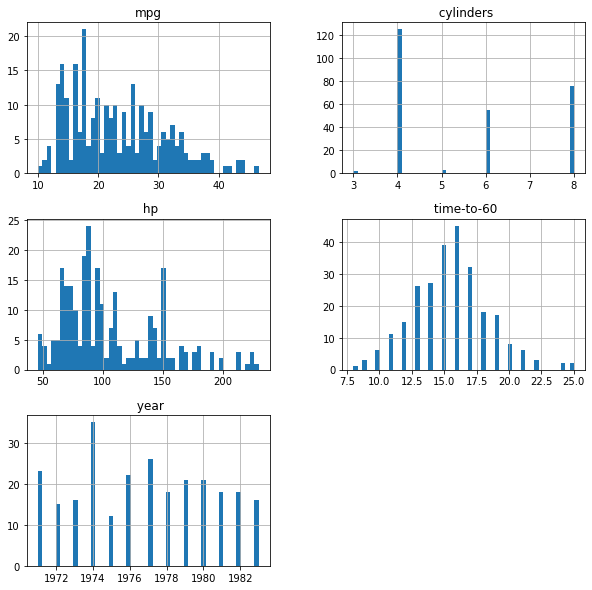

In [6]:
_ = df.hist(figsize=(10,10), bins=50) #bins significa que estamos a agrupar em grupos 

From the above results, there is no need to fill data. 

# Normalize dataset

In [7]:
# fix columns names #percebemos que existem problemas porque ao fazer df.columns percebemos que existem espaços e não pode ser 
df.columns = list(map(lambda x: x.strip(" "), df.columns))
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [8]:
for col in df.columns: #forma mais automática de encontrar as colunas que possam ter espaços 
    try:
        df[col].astype("int")
    except:
        print (f"{col} contains issue")

cubicinches contains issue
weightlbs contains issue
brand contains issue


In [9]:
# Bin age of the car #dividimos em 5 grupos 
df["year_bin"] = pd.cut(df["year"], 5)
df["year_bin"].value_counts()

(1975.8, 1978.2]      66
(1970.988, 1973.4]    54
(1980.6, 1983.0]      52
(1973.4, 1975.8]      47
(1978.2, 1980.6]      42
Name: year_bin, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder #esta é uma forma automática de transformar em números em vez de utilizar o dicionário

In [11]:
le = LabelEncoder()
df["year"] = le.fit_transform(df["year_bin"])
df.drop("year_bin", axis=1, inplace=True)

In [12]:
set(df.brand)

{' Europe.', ' Japan.', ' US.'}

In [13]:
le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

In [14]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
df = sc.fit_transform(df)

ValueError: could not convert string to float: ''

In [15]:
df.info() #podemos verificar que não existem NaN, então concluimos que poderão existir strings nos dados - o próprio código é que diz que é ''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int32  
 7   brand        261 non-null    int32  
dtypes: float64(1), int32(2), int64(3), object(2)
memory usage: 14.4+ KB


In [16]:
# cubicinches and weightlbs also may have some strings in the data - dtype object 

In [17]:
import numpy as np
def find_empty_string(data):
    if data == '' or data == ' ':
        return np.nan
    else:
        return data

In [18]:
df.cubicinches = df.cubicinches.apply(find_empty_string) #encontrar os empty strings 
df.weightlbs = df.weightlbs.apply(find_empty_string)

In [19]:
df.weightlbs.apply(find_empty_string).isna().sum() #encontramos 3 

3

In [20]:
df[df.weightlbs.apply(find_empty_string).isna()] #localização 

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225,90,NaN,19,4,2
33,21.0,6,199,90,NaN,15,0,2
172,29.0,4,68,49,NaN,20,1,0


In [21]:
df.cubicinches.apply(find_empty_string).isna().sum() #encontramos 2 

2

In [22]:
df.cubicinches.astype(int) #tentamos converter para inteiro e deu erro 

ValueError: cannot convert float NaN to integer

In [23]:
data = []
for i in df.cubicinches:
    try:
        data.append(int(i))
    except:
        print(i)

nan
nan


In [24]:
cilinder_average = sum(data)/len(data) #calculamos a média 

In [25]:
df.cubicinches = df.cubicinches.fillna(cilinder_average).astype(int) #substituimos pela média 

In [26]:
data = []
for i in df.weightlbs:
    try:
        data.append(int(i))
    except:
        print(i)
        

nan
nan
nan


In [27]:
weightlbs_average = sum(data)/len(data) #calculamos a média 

In [28]:
weightlbs_average

3009.8333333333335

In [29]:
df.weightlbs = df.weightlbs.fillna(weightlbs_average).astype(int)

In [30]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,0,2
1,31.9,4,89,71,1925,14,3,0
2,17.0,8,302,140,3449,11,0,2
3,15.0,8,400,150,3761,10,0,2
4,30.5,4,98,63,2051,17,2,2
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,3,2
257,36.1,4,91,60,1800,16,3,1
258,22.0,6,232,112,2835,15,4,2
259,18.0,6,232,100,3288,16,0,2


In [31]:
sc = StandardScaler()
df = sc.fit_transform(df)

# Apply TSNE

In [32]:
from sklearn.manifold import TSNE

In [33]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(df)
tsne_result.shape

C:\Users\PTL14736\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PTL14736\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(261, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


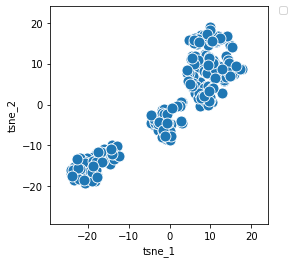

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

From the T-SNE plot, we can see that 3 or 4 clusters may exist

# Apply PCA 

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [37]:
import matplotlib.pyplot as plt

In [62]:
n_components = 2

pca_result = pca.fit_transform(df)
pca_result.shape

(261, 2)

In [63]:
principalDf = pd.DataFrame(data = df_reduced_components
, columns = ['principal component 1', 'principal component 2'])

In [64]:
principalDf

,principal component 1,principal component 2
0,3.550067,0.719051
1,-2.565616,0.500361
2,2.718132,0.821140
3,3.540131,0.781104
4,-1.963580,-0.306098
...,...,...
256,1.999298,-1.149289
257,-2.788968,-0.314529
258,0.225033,-1.509496
259,0.944747,0.789226


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


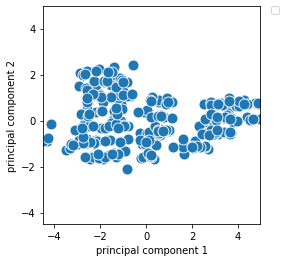

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
pca_result_df = pd.DataFrame({'principal component 1': pca_result[:,0], 'principal component 2': pca_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='principal component 1', y='principal component 2', data=pca_result_df, ax=ax,s=120)
lim = (pca_result.min(), pca_result.max())
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Let's Apply k-means

In [50]:
from sklearn.cluster import KMeans

In [51]:
# Let's just confirm that  the data is normal distributed
pd.DataFrame(df).describe()

,0,1,2,3,4,5,6,7
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,3.143505e-16,2.124737e-16,8.443650e-17,9.831429e-17,-2.475670e-16,-2.043916e-16,2.911145e-17,1.795073e-16
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.683385e+00,-1.497144e+00,-1.223544e+00,-1.493239e+00,-1.648229e+00,-2.598203e+00,-1.402393e+00,-1.833878e+00
25%,-7.997404e-01,-9.191048e-01,-9.197567e-01,-7.758132e-01,-8.918596e-01,-5.328295e-01,-6.888950e-01,-5.574989e-01
50%,-1.466117e-01,2.369740e-01,-4.134443e-01,-2.810368e-01,-1.248703e-01,1.556284e-01,2.460339e-02,7.188801e-01
75%,7.242265e-01,1.393053e+00,9.305848e-01,7.827325e-01,7.719173e-01,4.998573e-01,7.381017e-01,7.188801e-01
max,3.003774e+00,1.393053e+00,2.339054e+00,3.058704e+00,2.344835e+00,3.253689e+00,1.451600e+00,7.188801e-01


In [52]:
inertias = []
mapping2 = {}
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
 
    inertias.append(kmeanModel.inertia_)
 
    mapping2[k] = kmeanModel.inertia_

C:\Users\PTL14736\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PTL14736\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


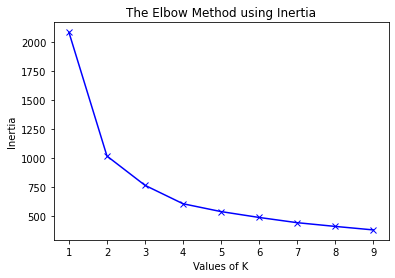

In [53]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [54]:
# plot data with 3 clusters
kmeanModel = KMeans(n_clusters=3).fit(df)
kmeanModel.fit(df)

KMeans(n_clusters=3)

In [60]:
labels = kmeanModel.labels_
labels 

array([2, 3, 2, 2, 1, 0, 2, 2, 3, 1, 1, 1, 2, 2, 0, 2, 1, 2, 3, 3, 1, 3,
       0, 2, 1, 1, 3, 2, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 3, 3, 0, 2, 3, 2, 3, 2, 2, 0, 1, 3, 2, 0, 3, 1, 1, 2, 0,
       3, 1, 3, 2, 0, 1, 3, 3, 3, 1, 0, 3, 3, 1, 2, 2, 2, 3, 3, 3, 0, 0,
       3, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 3, 1, 1, 1, 1, 3, 3, 2,
       3, 3, 2, 1, 1, 0, 0, 0, 1, 2, 3, 3, 2, 0, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 2, 2, 2, 3, 2, 3, 3, 0, 3, 1, 1, 0, 3, 0, 1, 2, 2, 1, 1, 2, 0,
       3, 0, 3, 1, 0, 0, 1, 2, 0, 0, 3, 0, 0, 1, 0, 1, 1, 3, 3, 1, 3, 3,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       3, 1, 3, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 3, 0, 1, 1, 2, 0, 2,
       0, 3, 2, 0, 2, 3, 2, 3, 0, 1, 2, 1, 0, 2, 3, 1, 2, 0, 1, 3, 2, 0,
       2, 3, 2, 2, 2, 1, 3, 1, 1, 3, 1, 2, 0, 3, 2, 1, 0, 0, 0])

 Quais sao as features que influenciam mais cada cluster? O k-mean nao nos diz. Podemos usar uma DT porque já temos labels e treinamos como se fosse um problema de supervised learning. O objetivo era chegar a importância das features pois daí conseguimos tirar esse dado. 
df['labels'] = labels 
dt.feature_importances_

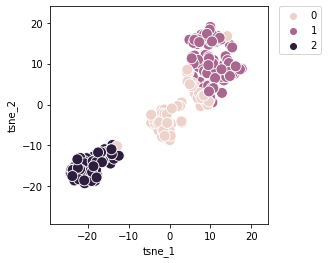

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label':labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2',hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [57]:
# Let's try with 4 clusters
kmeanModel = KMeans(n_clusters=4).fit(df)
kmeanModel.fit(df)

KMeans(n_clusters=4)

In [58]:
labels = kmeanModel.labels_

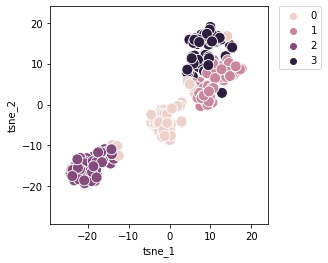

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label':labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2',hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)